In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
td = pd.read_csv('train.csv')
tst = pd.read_csv('test.csv')
smp = pd.read_csv('sample_submission.csv')

In [7]:
td

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [8]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
tst

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [11]:
tst.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [15]:
def check_null_status(td, tst):
    null_data = pd.DataFrame({'train_null_data %':[None],'test_null_data %':[None]}, index=tst.columns)
    for col in tst.columns:
        null_data.loc[col] = (round(sum(td[col].isna())/td.shape[0],2)*100,round(sum(td[col].isna())/tst.shape[0],2)*100)
    return null_data
check_null_status(td, tst)

,train_null_data %,test_null_data %
Id,0.0,0.0
MSSubClass,0.0,0.0
MSZoning,0.0,0.0
LotFrontage,18.0,18.0
LotArea,0.0,0.0
...,...,...
MiscVal,0.0,0.0
MoSold,0.0,0.0
YrSold,0.0,0.0
SaleType,0.0,0.0


In [16]:
td.drop(['Id','PoolQC','Fence','MiscFeature','Alley'], axis=1, inplace=True)
tst.drop(['Id','PoolQC','Fence','MiscFeature','Alley'], axis=1, inplace=True)

In [17]:
td.select_dtypes(include='O').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
tst.select_dtypes(include='O').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [20]:
check_null_status(td, tst)

,train_null_data %,test_null_data %
MSSubClass,0.0,0.0
MSZoning,0.0,0.0
LotFrontage,18.0,18.0
LotArea,0.0,0.0
Street,0.0,0.0
...,...,...
MiscVal,0.0,0.0
MoSold,0.0,0.0
YrSold,0.0,0.0
SaleType,0.0,0.0


In [21]:
import re
def create_new_feature(data):
    dt = re.findall(r'\d+\.*\d*', str(data))
    if dt:
        return float(dt[0])
    else:
        return 1
    
def create_new_cat_feature(data):
    dt = re.findall(r'[a-zA-Z]+', str(data))
    if dt:
        return str(dt[0])
    else:
        None
        
for col in ['LotShape','BldgType','HouseStyle']:
    td[str(col)+'_n'] = td[col].apply(create_new_feature)
    td[col] = td[col].apply(create_new_cat_feature)

    tst[str(col)+'_n'] = tst[col].apply(create_new_feature)
    tst[col] = tst[col].apply(create_new_cat_feature)


In [22]:
sales = td['SalePrice']
td.drop(['SalePrice'], axis=1, inplace=True)

In [24]:
from sklearn.impute import SimpleImputer
## for numeric data
smplimput = SimpleImputer(strategy='mean')
td1 = pd.DataFrame(smplimput.fit_transform(td.select_dtypes(exclude='O')), columns=td.select_dtypes(exclude='O').columns)
tst1 = pd.DataFrame(smplimput.transform(tst.select_dtypes(exclude='O')), columns=tst.select_dtypes(exclude='O').columns)
## for categorical data
smplimput2 = SimpleImputer(strategy='most_frequent')
td2 = pd.DataFrame(smplimput2.fit_transform(td.select_dtypes(include='O')), columns=td.select_dtypes(include='O').columns)
tst2 = pd.DataFrame(smplimput2.transform(tst.select_dtypes(include='O')), columns=tst.select_dtypes(include='O').columns)

In [25]:
td = pd.concat([td1,td2],axis=1, ignore_index=False)
td['SalePrice'] = sales
tst = pd.concat([tst1,tst2],axis=1, ignore_index=False)

In [26]:
check_null_status(td, tst)

,train_null_data %,test_null_data %
MSSubClass,0.0,0.0
LotFrontage,0.0,0.0
LotArea,0.0,0.0
OverallQual,0.0,0.0
OverallCond,0.0,0.0
...,...,...
GarageQual,0.0,0.0
GarageCond,0.0,0.0
PavedDrive,0.0,0.0
SaleType,0.0,0.0


In [27]:
td.sample(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
675,160.0,24.000000,2289.0,6.0,6.0,1978.0,1978.0,0.0,311.0,0.0,...,Typ,TA,Attchd,Unf,TA,TA,Y,WD,Normal,148500
953,60.0,70.049958,11075.0,5.0,4.0,1969.0,1969.0,232.0,562.0,193.0,...,Min2,Po,Attchd,RFn,TA,TA,Y,WD,Normal,172000
1252,20.0,62.000000,9858.0,5.0,6.0,1968.0,1968.0,0.0,510.0,0.0,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,130000
753,60.0,80.000000,10240.0,8.0,5.0,2005.0,2005.0,178.0,0.0,0.0,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,275500
701,20.0,80.000000,9600.0,7.0,5.0,1969.0,1969.0,168.0,0.0,0.0,...,Typ,Gd,Attchd,Unf,TA,TA,Y,COD,Normal,140000
1154,60.0,70.049958,13700.0,7.0,6.0,1965.0,1988.0,288.0,454.0,0.0,...,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Normal,201800
301,60.0,66.000000,16226.0,8.0,5.0,1998.0,1999.0,0.0,281.0,0.0,...,Typ,TA,BuiltIn,Fin,TA,TA,Y,WD,Normal,267000
237,60.0,70.049958,9453.0,7.0,7.0,1993.0,2003.0,0.0,402.0,0.0,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,194500
1022,50.0,52.000000,9439.0,5.0,5.0,1930.0,1950.0,0.0,324.0,0.0,...,Typ,Gd,Detchd,Unf,Fa,Fa,Y,WD,Normal,87000
1074,20.0,74.000000,8556.0,7.0,5.0,2006.0,2006.0,0.0,0.0,0.0,...,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal,194000


In [37]:
def detect_outlier(data):
    outlier=[]
    q1 = np.percentile(data , 1)
    q3 = np.percentile(data , 99)
    for i in data:
        if i > q3 or i < q1:
            outlier.append(True)
        else:
            outlier.append(False)
    return outlier
out_train = td.copy()
out_test = tst.copy()
def plot_vars(data, features, target):
    fig, axis = plt.subplots(len(features), 2, figsize=(20,200))
    for i, col in enumerate(features):
        data['Outlier'] = detect_outlier(data[col])
        sns.scatterplot(data=data, x=col, y=target, ax=axis[i, 0], hue='Outlier')
        sns.kdeplot(data=data, x=col, ax=axis[i, 1], hue='Outlier', warn_singular=False)

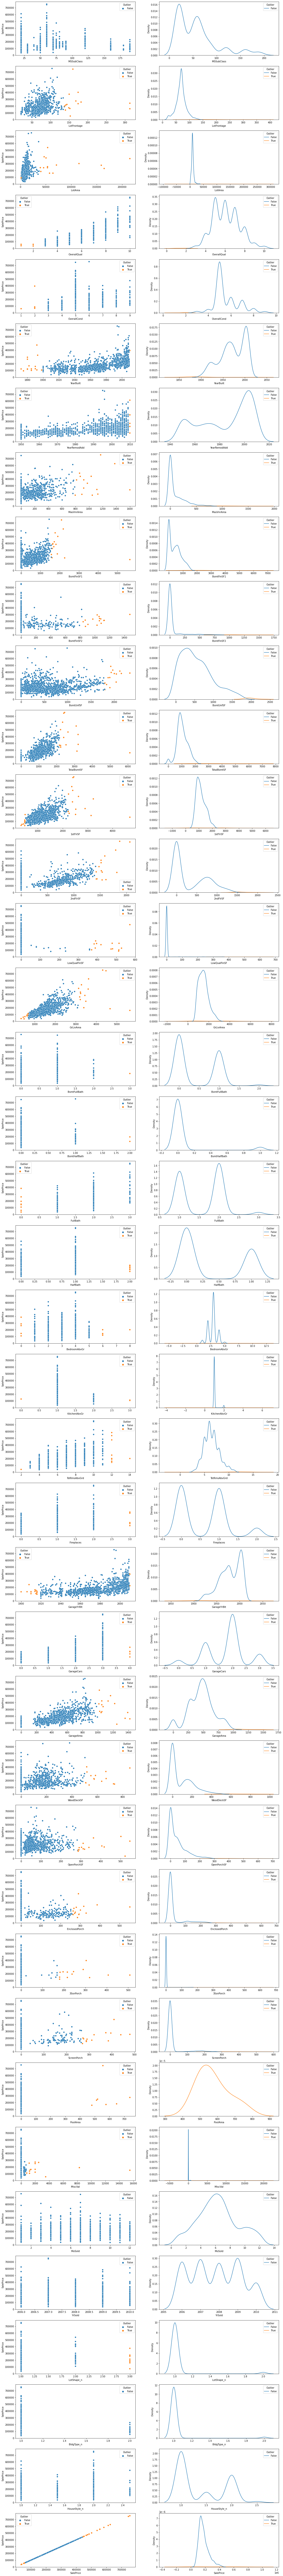

In [38]:
colmns = out_train.select_dtypes(exclude=['O']).columns
plot_vars(out_train, colmns, 'SalePrice')

In [39]:
cat_colmns = td.select_dtypes(include='O').columns

In [40]:
def cate_plot(data, features):
    fig, axis = plt.subplots(len(features), 2, figsize=(20,200))
    for i, col in enumerate(features):
        sns.countplot(data=data, x=col, ax=axis[i, 0])
        plt.xticks(rotation=45)
        sns.histplot(data=data, x=col, ax=axis[i, 1], kde=True)
        plt.xticks(rotation=45)

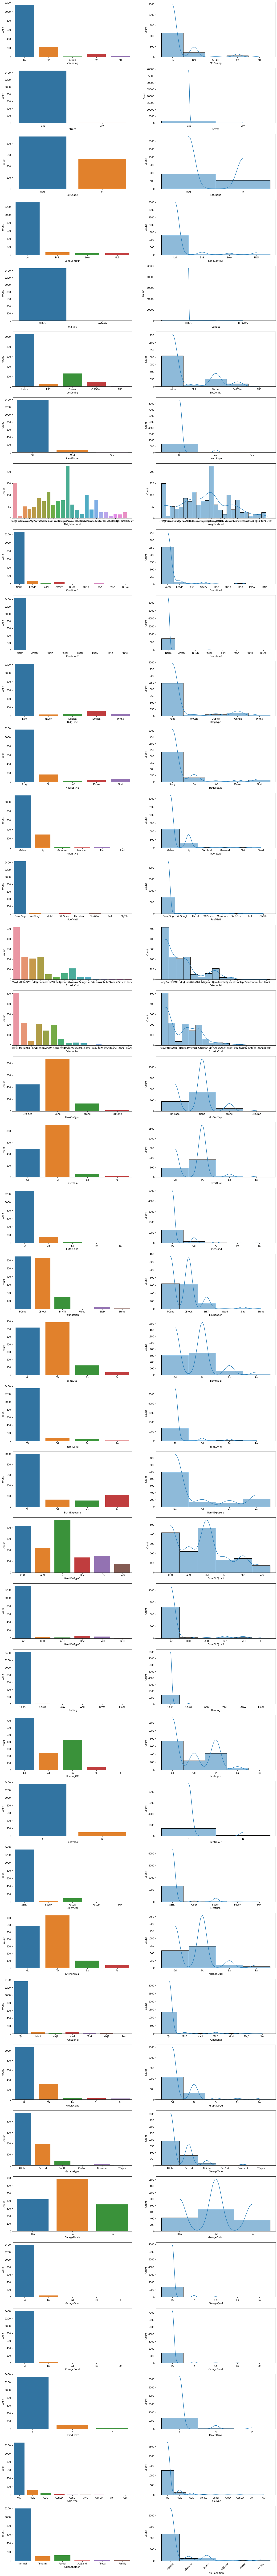

In [43]:
cate_plot(out_train[cat_colmns].astype(str), cat_colmns)

In [64]:
X = td.drop(columns=['SalePrice'])
y = td.SalePrice

less_than_0_corr = td.corrwith(td['SalePrice'])[td.corrwith(td['SalePrice']) < 0].index.to_list()
cols_to_remove = list(outliers.index) + less_than_0_corr

number_df = X.select_dtypes(include='number')
number_df.head()

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

number_pipeline = Pipeline([
        # We have observed that the data is skewed, it is better approach to consider using
        # median value to replace missing values. 
        ('imputer', SimpleImputer(strategy="median")),
        # MinMaxScaler is useful when the distribution isn't Normal or Gaussian.
        ('scaler', MinMaxScaler()),
    ])

In [65]:
cat_df = X.select_dtypes(include='object')

cat_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [67]:
from sklearn.preprocessing import OrdinalEncoder

cat_pipeline = Pipeline([
        # we will fill the NaNs with the mode
        ('imputer', SimpleImputer(strategy="most_frequent")),
        # the features has order meaning
        ('encoder', OrdinalEncoder()),
    ])

In [68]:
from sklearn.compose import ColumnTransformer

# keep only the wanted columns
num_attribs = list(set(number_df) - set(cols_to_remove))
cat_attribs = list(set(cat_df) - set(cols_to_remove))

# Let us combine the numeric and categorical pipelines
preprocessor = ColumnTransformer([
        ("num", number_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ], 
    remainder='drop' # the remainder features will be dropped [default]
)

# Prepare a df form the ML models by calling the preprocessor
X_prepared = preprocessor.fit_transform(X)
# inspect the number of rows & columns of the prepared df
X_prepared.shape

(1460, 68)

In [69]:
from sklearn.linear_model import LinearRegression
random_state = 10 

linear_reg = LinearRegression()

# Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
log_y = np.log(y)
linear_reg.fit(X_prepared, log_y)

LinearRegression()

In [70]:
from sklearn.metrics import mean_squared_error

# create a finction that calculates the scores of the model
def score_model(model):
    y_pred = model.predict(X_prepared)
    model_mse = mean_squared_error(log_y, y_pred)
    return np.sqrt(model_mse)

In [71]:
print("Linear Regression:{:.10f} ".format(score_model(linear_reg)))

Linear Regression:0.1389984305 


In [72]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=random_state)
rf.fit(X_prepared, log_y)

RandomForestRegressor(random_state=10)

In [73]:
print("RandomForestRegressor :{:.10f} ".format(score_model(rf)))

RandomForestRegressor :0.0531984836 


In [75]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_prepared, log_y,
                         scoring="neg_mean_squared_error", cv=10)
rf_scores = np.sqrt(-scores)
display_scores(rf_scores)

Scores: [0.15078887 0.12455419 0.1373125  0.17126668 0.16823434 0.1179105
 0.13780512 0.12640989 0.1476782  0.15361976]
Mean: 0.14355800539437363
Standard deviation: 0.017123934988518493


In [80]:
scores = cross_val_score(linear_reg, X_prepared, log_y,
                         scoring="neg_mean_squared_error", cv=10)
rf_scores = np.sqrt(-scores)
display_scores(rf_scores)

Scores: [0.13250093 0.11691201 0.12837729 0.1912113  0.15762692 0.11947192
 0.14637096 0.1317226  0.25295632 0.14940176]
Mean: 0.15265520023212115
Standard deviation: 0.03928635040358345


In [88]:
#Based on the above scores the final model selection is RandomForestRegressor
final_model = RandomForestRegressor(bootstrap=False, max_depth=18, max_features='sqrt',
                                    n_estimators=1650, random_state=10)
final_model.fit(X_prepared, log_y)

RandomForestRegressor(bootstrap=False, max_depth=18, max_features='sqrt',
                      n_estimators=1650, random_state=10)

In [82]:
rmse = score_model(final_model)

In [83]:
full_pipeline = Pipeline([
    ("preparation", preprocessor),
    ("model", final_model)
    ])

full_pipeline.fit(X, log_y)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['BedroomAbvGr', '2ndFlrSF',
                                                   'WoodDeckSF', 'TotalBsmtSF',
                                                   'Fireplaces', 'HouseStyle_n',
                                                   'MasVnrArea', 'YearRemodAdd',
                                                   'GrLivArea', 'GarageYrBlt',
                                                   'ScreenPorch', 'BsmtFinSF1',
                                                   '3SsnPorch', 'MoSold',
              